### Task 3: Unsupervised learning - prediction and visualization using Kmeans clustering

### Name: Sanjana Basu

Unsupervised learning involves building a machine learning algorithm that can draw inferences from datasets without labelling the responses. In other words, classifying the datasets into clusters using the training set and later using the trained model to identify which cluster the test data will automatically go into.

K-means clustering is a very good technique to carry out unsupervised learning. This involves splitting the dataset into K number of clusters. Then random but unique centroids are chosen for each cluster and that is used to train the KNN classifier. This classifier is used to build the initial random set of clusters. Thereafter the centroid keeps adjusting itself to the mean of the clusters and this is a process that goes on for several iterations till the centroid stabilizes.

__________________________________________________________________________________________________________________________________

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

### Reading the file

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for NaN values

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Dropping irrelevant columns

In [5]:
df1=df.drop('Id',axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df2=df1.drop('Species',axis=1)
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
x1=df2.values
from sklearn import preprocessing
X = preprocessing.scale(x1)

### Using the elbow method to find out the number of clusters

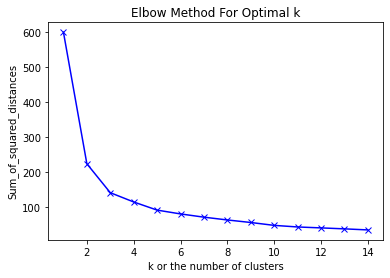

In [8]:
from sklearn.cluster import KMeans
Sum_of_squared_distances=[]
for k in range(1,15):
        km = KMeans(n_clusters=k, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
        km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k or the number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


We see the elbow at 3 hence n_clusters or number of clusters is 3

In [20]:
y=np.array(df1['Species'])

### Building the model and training it

In [10]:
kmeans = KMeans(n_clusters=3, init = 'k-means++',
                max_iter = 300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
kmeans_pred = kmeans.predict(X)


### Plotting the model

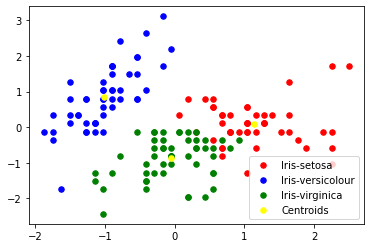

In [12]:
plt.scatter(X[kmeans_pred == 0, 0], X[kmeans_pred == 0, 1], 
            s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(X[kmeans_pred == 1, 0], X[kmeans_pred == 1, 1], 
            s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[kmeans_pred == 2, 0], X[kmeans_pred == 2, 1], 
            s = 30, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 30, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### Cross- checking the cluster sizes 

In [13]:
pd.crosstab(kmeans_pred, columns=kmeans_pred)

col_0,0,1,2
row_0,,,
0,47,0,0
1,0,50,0
2,0,0,53


In [14]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace= True)

In [15]:
df['Species_predicted']=kmeans_pred

In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_predicted
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1


In [26]:
a=df['Species'].value_counts().values
b=df['Species_predicted'].value_counts()
check=pd.DataFrame({'Actual':a,'Model':b},columns=['Actual','Model'])
check

,Actual,Model
2,50,53
1,50,50
0,50,47


Between 1 and 2, there are very few errors are there which is minimal in a dataset of 150 entries.

## THANK YOU